# John's EDA

### **Importing Modules**

In [1]:
#Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as FuncAnimation
from datetime import datetime
%matplotlib inline
#%matplotlib notebook
plt.style.use('seaborn-pastel')

Read Pickle Files

In [2]:
df1 = pd.read_pickle('Data_pkl\\cases_by_state.pkl')
df2 = pd.read_pickle('Data_pkl\\deaths_by_state.pkl')
df1.head()
df2.head()

,calendar,Washington,Illinois,California,Arizona,Massachusetts,Wisconsin,Texas,Nebraska,Utah,...,Alaska,Maine,Alabama,Idaho,Montana,Puerto Rico,Virgin Islands,Guam,West Virginia,Northern Mariana Islands
0,January-21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,January-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,January-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,January-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,January-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df1.index = df1.calendar
df1 = df1.drop(['calendar'], axis=1)
df1.head()

AttributeError: 'DataFrame' object has no attribute 'calendar'

In [68]:
df1.head(20)

,Washington,Illinois,California,Arizona,Massachusetts,Wisconsin,Texas,Nebraska,Utah,Oregon,...,Alaska,Maine,Alabama,Idaho,Montana,Puerto Rico,Virgin Islands,Guam,West Virginia,Northern Mariana Islands
calendar,,,,,,,,,,,,,,,,,,,,,
January-21,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
January-22,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
January-23,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
January-24,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
January-25,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
January-26,1,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
January-27,1,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
January-28,1,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
January-29,1,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
dft = df1.T
dft.head()

#column=dft.iloc[:,0].name
#dfs=dft.sort_values(by=[column])
dfs=dft.sort_index()
dfs

calendar,January-21,January-22,January-23,January-24,January-25,January-26,January-27,January-28,January-29,January-30,...,April-06,April-07,April-08,April-09,April-10,April-11,April-12,April-13,April-14,April-15
Alabama,0,0,0,0,0,0,0,0,0,0,...,2006,2197,2499,2838,3008,3262,3583,3805,3953,4241
Alaska,0,0,0,0,0,0,0,0,0,0,...,189,211,224,233,244,255,270,275,283,291
Arizona,0,0,0,0,0,1,1,1,1,1,...,2466,2577,2726,3018,3112,3393,3539,3702,3806,3962
Arkansas,0,0,0,0,0,0,0,0,0,0,...,927,997,1077,1146,1202,1228,1280,1475,1498,1599
California,0,0,0,0,1,2,2,2,2,2,...,16361,17539,19043,20191,21366,22421,23323,24334,25758,27107
Colorado,0,0,0,0,0,0,0,0,0,0,...,5175,5429,5656,6202,6510,6893,7303,7691,7941,8280
Connecticut,0,0,0,0,0,0,0,0,0,0,...,6906,7781,8781,9784,10538,11510,12035,13381,13989,14755
Delaware,0,0,0,0,0,0,0,0,0,0,...,783,928,1116,1209,1326,1479,1625,1761,1926,2014
District of Columbia,0,0,0,0,0,0,0,0,0,0,...,1097,1211,1440,1523,1660,1778,1875,1955,2058,2197
Florida,0,0,0,0,0,0,0,0,0,0,...,13621,14739,15690,16819,17960,18978,19855,21011,21620,22526


In [ ]:
dft.shape
# dft.iloc[:,70]

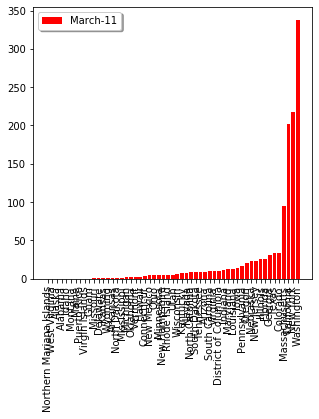

In [48]:
%matplotlib inline

frameno = 50
column=dft.iloc[:,frameno].name
dfs=dft.sort_values(by=[column])
dfs.head()
fig, axs = plt.subplots(figsize=(5,5))
axs.bar(dfs.index, dfs.iloc[:,frameno], color='red')
# axs.set_xlim(0,55)
# axs.set_ylim(0,10000)
plt.xticks(rotation=90)
axs.legend([column], loc = 'upper left', shadow=True)

plt.show()

<IPython.core.display.Javascript object>


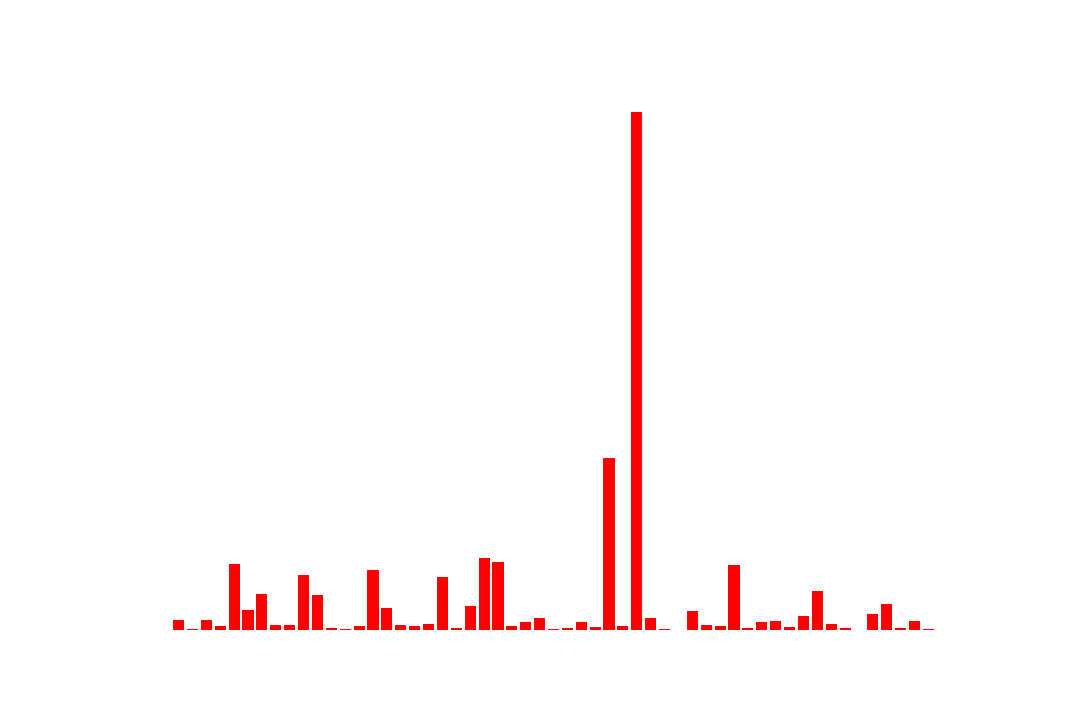

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [73]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
%matplotlib notebook

fig, axs = plt.subplots(figsize=(15,10))
#axs.set_xlim(0,55)
#axs.set_ylim(0,10)
plt.xticks(rotation=90, fontsize=10)
axs.set_title("Cases Over Time", fontsize=16)
axs.set_ylabel('# of Cases', fontsize=10)
axs.set_xlabel('State', fontsize=10)

def init():
    return

def animate(frameno):
    column=dft.iloc[:,frameno].name
    dfs=dft.sort_index()
    axs.legend([column], loc = 'upper left', shadow=False)
    return axs.bar(dfs.index, dfs.iloc[:,frameno], color='red')

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=86, interval=86, blit=False)

anim.save('CaseOverTime.gif', writer='ffmpeg')

plt.show()


# **Working on Population & Density Cases/Deaths on April 15th**

Action Plan:
1) Gather datasets needed to find Population Versus Cases and Deaths.  
2) Merge three data tables together: Population/ZipCode;  FIPS/ZIP Conversion;  COVID19 cases/death data  
3) Pickle and simple plot

**note:** FIPS = County Code

## *Retrieving data and Formatting - Population (& later-on add Density)*

In [ ]:
#Reading and Filtering Files
population = pd.read_csv("Data_Raw\\population_by_zip_2010.csv")   #Population by Zip Code Data
fips_zip = pd.read_excel("Data_Raw\\fips_zip\ZIP_COUNTY_032020.xlsx")  #Conversion between FIPS and ZIP Data
counties_2 = pd.read_csv("Data_Raw\\us-counties.csv")                  #COVID19 cases/deaths data
counties_2["date"] = pd.to_datetime(counties_2["date"])
counties_2["date"] = counties_2["date"].dt.strftime('%B-%d')

#population.head()
#fips_zip.head()
#counties_2.head()

In [ ]:
#Formatting Population by Zip Code Data
population_byzip = population[['zipcode','population']]     #Only need zip code and population columns

#Since there are multiple zipcodes with population (males,females,etc..), sum up the population of each zip code and group
population_byzip = population_byzip.groupby('zipcode').agg('sum')    
population_byzip.head()
#len(population_byzip)
#population_byzip[population_byzip.index==66503]     #test out to see your LOCAL zipcode population, 66503 (Manhattan, KS) has 42k people in 2010, sounds reasonable.

In [ ]:
population_byzip[population_byzip.population>300000]

In [ ]:
#Formatting FIPS/ZIP Data
fips_zip = fips_zip[['ZIP','COUNTY']]   #Only need ZIP and COUNTY (same as fips) columns
fips_zip.head()
#len(fips_zip)

In [ ]:
fips_zip[fips_zip.COUNTY==4013]

In [ ]:
#Formatting COVID19 cases/deaths Data
counties_2_apr15 = counties_2[counties_2.date=='April-15'][['fips','cases','deaths']]   #only need latest (APril-15) data for FIPS, cases, deaths
counties_2_apr15 = counties_2_apr15.dropna()  #need to drop NA
counties_2_apr15.head()
#len(counties_2_apr15.fips)

## *MERGING Data*


In [ ]:
#Merge population by zip with FIPS/ZIPs data to get population by FIPS

pop_zipfips = population_byzip.merge(fips_zip, how='left', left_on='zipcode', right_on='ZIP')    #Merging data
#pop_zipfips.head()
population_byfips = pop_zipfips[['population','COUNTY']]                  #drop zip code now, not needed anymore

#Since population data was based on zip codes, there are multiple zip codes per FIPS/County Code.
#Therefore, group by FIPS code and sum up the population in each FIPS code
population_byfips = population_byfips.groupby('COUNTY').agg('sum')        
population_byfips.head()
#len(population_byfips.index.unique())

In [ ]:
population_byfips[population_byfips.population>1600000]

In [ ]:
#Merge population by FIPS with COVID19 cases/deaths data to get population versus deaths/cases

casedeath_pop = counties_2_apr15.merge(population_byfips, how='left', left_on = 'fips', right_on = 'COUNTY')   #Merging data
casedeath_pop.head()
#len(casedeath_pop)

## *Data Minification*
Save the final dataframes as pickle files.

In [ ]:
casedeath_pop.to_pickle('Data_pkl\\cases_deaths_population.pkl')

In [ ]:
df3 = pd.read_pickle('Data_pkl\\cases_deaths_population.pkl')

## *Initial Plot*

In [ ]:
# Cases by Population
fig, axs = plt.subplots(figsize=(9,9))

#scatterplot
axs.scatter(df3.population,df3.deaths, color='r')
axs2 = axs.twinx()
axs2.scatter(df3.population,df3.cases, color='b')
axs.legend(['Deaths'], loc = 'upper left', shadow=True)
axs2.legend(['Cases'], shadow=True)

#Labeling
axs.set_title("Cases and Deaths (Apr-15-2020) Versus Population (2010)", fontsize=20)
axs.set_ylabel('Deaths', fontsize=15, color = 'r')
axs2.set_ylabel('Cases', fontsize=15, color = 'b')
axs.set_xlabel('Population', fontsize=15)
axs.xaxis.set_major_locator(plt.MaxNLocator(5))


In [ ]:
#Same plot as above except remove county population greater than 1.6million people
df3_less = df3[df3.population <1600000]

# Cases by Population
fig, axs = plt.subplots(figsize=(9,9))

#scatterplot
axs.scatter(df3_less.population,df3_less.deaths, color='r')
axs2 = axs.twinx()
axs2.scatter(df3_less.population,df3_less.cases, color='b')
axs.legend(['Deaths'], loc = 'upper left', shadow=True)
axs2.legend(['Cases'], shadow=True)

#Labeling
axs.set_title("Cases and Deaths (Apr-15-2020) Versus Population (2010)", fontsize=20)
axs.set_ylabel('Deaths', fontsize=15, color = 'r')
axs2.set_ylabel('Cases', fontsize=15, color = 'b')
axs.set_xlabel('Population', fontsize=15)
axs.xaxis.set_major_locator(plt.MaxNLocator(5))
